# In this exploratory data analysis (EDA), we will analyze the data of more than 10,000 rows containing real estate ads data for the sale of villas 🏠 during the year 2021 in the city of Riyadh, Saudi Arabia

 




## Mansour Hussain
### `Linkedin` 🔗: [Mansour Hussain](https://www.linkedin.com/in/mansourhussain/)

### `GitHub` 🔗: [Mansour Hussain](https://github.com/MansourHussain)

### `Twitter` 🔗: [Mansour Hussain](https://twitter.com/Mansourhussain0)

In [1]:
# Import libraries

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
df = pd.read_csv('Aqar_Cleaned.csv', index_col=0)

In [2]:
df.head()

,district,home_size,home_price
0,الرمال,300,1350000
1,الملقا,405,4500000
2,الياسمين,375,3700000
3,الفيحاء,700,2200000
4,عكاظ,350,980000


In [3]:
# show shape
df.shape

(10825, 3)

In [4]:
# show types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10825 entries, 0 to 10841
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    10825 non-null  object
 1   home_size   10825 non-null  int64 
 2   home_price  10825 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 338.3+ KB


In [5]:
df.describe()

,home_size,home_price
count,10825.000000,1.082500e+04
mean,385.952794,2.163715e+06
std,402.240331,3.321829e+06
min,103.000000,5.000000e+04
25%,256.000000,1.120000e+06
50%,300.000000,1.300000e+06
75%,375.000000,2.000000e+06
max,15000.000000,1.000000e+08


In [6]:
# check the Null values
df.isnull().sum()

district      0
home_size     0
home_price    0
dtype: int64

In [7]:
# check the Null values
df.isna().sum()

district      0
home_size     0
home_price    0
dtype: int64

In [8]:
# show most district duplicated in the dataset.
df['district'].value_counts()

طويق             2364
الرمال           1311
بدر               616
عكاظ              591
المهدية           505
                 ... 
الملك عبدالله       1
المصفاة             1
الغنامية            1
الكبير              1
غبيرة               1
Name: district, Length: 128, dtype: int64

In [9]:
# check duplicated values, there is 6072 duplicated value
df.duplicated().sum()

6071

In [10]:
# show sample of duplicated values
duplicated_rows = df[(df['district']=='الرمال') & (df['home_price'] == 1370000) & (df['home_size'] == 300)]
duplicated_rows

,district,home_size,home_price
405,الرمال,300,1370000
685,الرمال,300,1370000
2681,الرمال,300,1370000
4928,الرمال,300,1370000
10837,الرمال,300,1370000


In [11]:
# drop duplicated values using drop_duplicates()
df.drop_duplicates(inplace=True)

In [12]:
# check duplicated values agian, there is no duplicated values anymore
df.duplicated().sum()

0

In [13]:
# show the shape of dataset afte drop duplicated values. Now, we have 4753 row.
df.shape

(4754, 3)

In [14]:
# here we have 5 rows called أحد which is same value with other one

len(df[(df.district == 'أحد')])

5

In [15]:
# here we have 5 rows also called احد which is same value with last one above
len(df[(df.district == 'احد')])

5

In [16]:
# we need to fix it to make it one value, one name
df['district'].replace('احد', 'أحد', inplace=True)

In [17]:
# Now, we fixed it and it became one an total 10
len(df[(df.district == 'أحد')])

10

In [18]:
# no duplicated value anymore
len(df[(df.district == 'احد')])

0

In [19]:
# Now, we have 127 district, it will be different after outliers removing
df['district'].unique()

array(['الرمال', 'الملقا', 'الياسمين', 'الفيحاء', 'عكاظ', 'المهدية',
       'البديعة', 'بدر', 'الغدير', 'طويق', 'القادسية', 'لبن', 'التعاون',
       'طيبة', 'النرجس', 'العارض', 'اليرموك', 'العزيزية', 'الرفيعة',
       'عرقة', 'الشفا', 'الحزم', 'النهضة', 'الربوة', 'العقيق', 'حطين',
       'الدولي', 'اشبيلية', 'الحمراء', 'الجنادرية', 'القدس', 'المنار',
       'النظيم', 'الشرق', 'الغربي', 'المونسية', 'نمار', 'القيروان',
       'الجديدة', 'الغربية', 'الوسطى', 'البيضاء', 'قرطبة',
       'الملك عبدالله', 'ديراب', 'الاندلس', 'النفل', 'السعادة', 'الواحة',
       'العليا', 'الزهرة', 'الروابي', 'السويدي', 'شبرا', 'الوشام',
       'المروج', 'الصحافة', 'النخيل', 'الضباط', 'أحد', 'الخطاب', 'الروضة',
       'السليمانية', 'الوسيطا', 'المعيزيلة', 'البيان', 'الخليج',
       'الخزامى', 'ثليم', 'غرناطة', 'المنصورية', 'الندى', 'الندوة',
       'المروة', 'الرحمانية', 'الخالدية', 'المحمدية', 'الورود', 'فيصل',
       'الشرقي', 'الريان', 'المنصورة', 'العريجاء', 'الفلاح', 'فهد',
       'الملز', 'السلام', 'الزه

In [20]:
df['district'].nunique()

127



## To make perfect analysis, we have to check the outliers in the dataset and remove it.

* I will make Boxplot to show outliers in Data

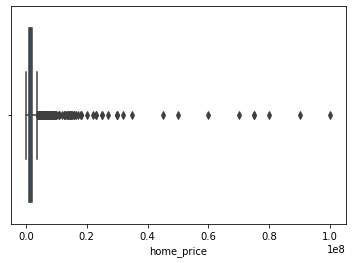

In [21]:
# the price outliers


ax = sns.boxplot(x=df['home_price'])

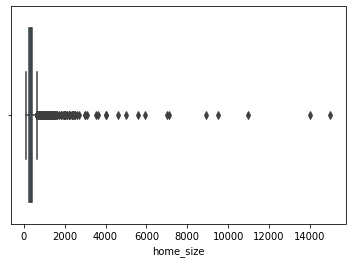

In [22]:
# the size outliers


ax = sns.boxplot(x='home_size', data=df)

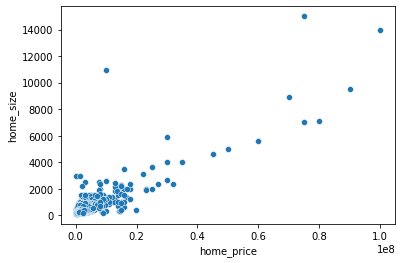

In [23]:
# show price & size outliers in scatter plot

sns.scatterplot(data=df,x=df['home_price'], y=df['home_size'])
plt.show()

In [24]:
# make function to show outliers in boxplot

def plot_boxplot(df, col):
    df.boxplot(column=[col])
    plt.grid(False)
    plt.show

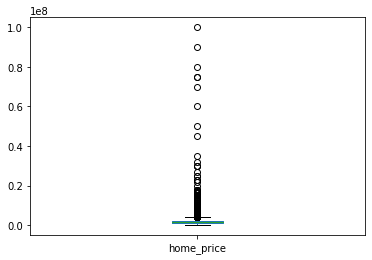

In [25]:
# outliers in prices
plot_boxplot(df, 'home_price')

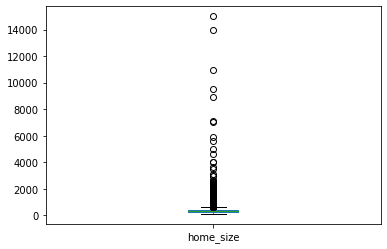

In [26]:
# outliers in size
plot_boxplot(df, 'home_size')

In [27]:
# Let's remove outliers by applying IQR 
outliers_values =[]

def outliers(pri, siz):
    q1 = pri[siz].quantile(0.25)
    q3 = pri[siz].quantile(0.75)
    iqr = q3 - q1
    
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    ls = pri.index[ (pri[siz] < lower_limit) | (pri[siz] > upper_limit) ]
    return ls

In [28]:
# here we can show the ouliers in a list


index_list = []
for outlier in ['home_size', 'home_price']:
    index_list.extend(outliers(df, outlier))

    
# index_list

In [29]:
# function to remove outliers
def remove_outliers(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls) 
    return df

## Here we will start new DF called `df_cleaned`, without outliers values, 

In [30]:
df_cleaned = remove_outliers(df, index_list)

In [31]:
# after remove outliers, we have 99 district
df_cleaned['district'].nunique()

114

In [32]:
# Now, we have 4102 rows
df_cleaned.shape

(4103, 3)

In [33]:
df_cleaned.describe()

,home_size,home_price
count,4103.000000,4.103000e+03
mean,330.329271,1.541124e+06
std,90.437838,6.813726e+05
min,103.000000,5.000000e+04
25%,260.000000,1.070000e+06
50%,312.000000,1.350000e+06
75%,375.000000,1.850000e+06
max,645.000000,3.850000e+06


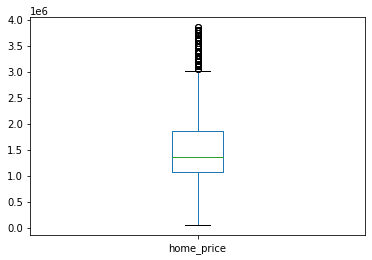

In [34]:
# we still have little outliers in prices
plot_boxplot(df_cleaned, 'home_price')

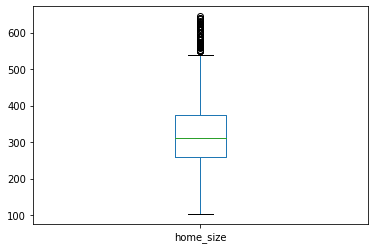

In [35]:
# we still have little outliers in size
plot_boxplot(df_cleaned, 'home_size')

In [36]:
df_cleaned.shape

(4103, 3)

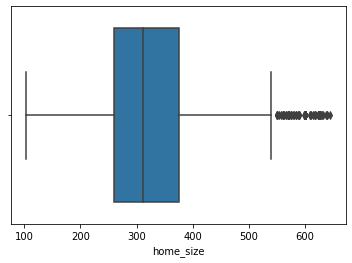

In [37]:
# another boxplot for home size
ax = sns.boxplot(x=df_cleaned['home_size'])

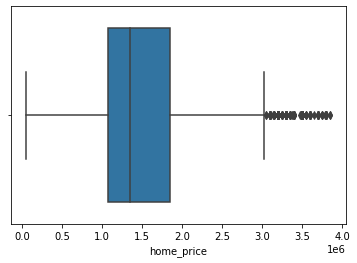

In [38]:
# another boxplot for home price

ax = sns.boxplot(x=df_cleaned['home_price'])

In [39]:
# 75% of houses is lower 1,900,000 Million SAR
df_cleaned.quantile(0.75)

home_size         375.0
home_price    1850000.0
Name: 0.75, dtype: float64

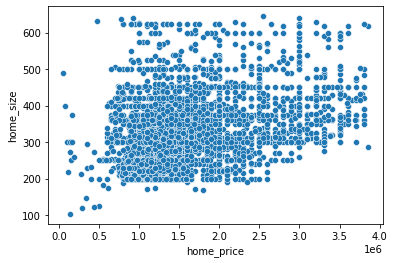

In [40]:
sns.scatterplot(data=df_cleaned,x=df_cleaned['home_price'], y=df_cleaned['home_size'])
plt.show()

# Analyzing

* 
* 
* 
 `Show avg of size & prices, and houses location in Dashboard` 🔗: [Tableau](https://public.tableau.com/app/profile/mansour5290/viz/_16482922707430/sheet5)

* 
* 
* 

In [41]:
# let's see the price & size avarege per district
avg = df_cleaned.groupby('district').mean()

In [42]:
avg_per_district = pd.DataFrame.from_dict(avg)

In [43]:
avg_per_district['district'] = avg_per_district.index

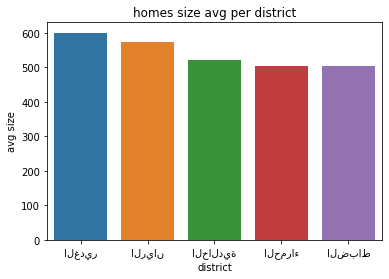

In [44]:
# size avarege per district
avg_per_district['district'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='home_size'), x="district", y="home_size")
plt.title('homes size avg per district')
plt.xlabel('district')
plt.ylabel('avg size')
plt.show()

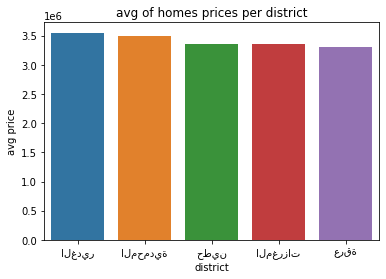

In [45]:
# price avarege per district
avg_per_district['district'] = avg_per_district.index

sns.barplot(data=avg_per_district.nlargest(n=5, columns='home_price'), x="district", y="home_price")
plt.title('avg of homes prices per district')
plt.xlabel('district')
plt.ylabel('avg price')
plt.show()

In [46]:
# Lowest price in the dataset
df_cleaned['home_price'].min()

50000

In [47]:
# Highest price in the dataset
df_cleaned['home_price'].max()

3850000

In [48]:
# Avg of all prices
df_cleaned['home_price'].mean()

1541123.7355593469

In [49]:
# Lowest size in the dataset
df_cleaned['home_size'].min()

103

In [50]:
# Highest size in the dataset
df_cleaned['home_size'].max()

645

In [51]:
# Avg of all size values
df_cleaned['home_size'].mean()

330.3292712649281

In [52]:
# Top 10 avg of prices per district

top_avg_price = df_cleaned.groupby(['district']).mean().nlargest(n=5, columns=['home_price'])#.plot(kind='barh')

top_avg_price

,home_size,home_price
district,,
الغدير,600.000000,3550000.0
المحمدية,325.000000,3500000.0
حطين,302.666667,3350000.0
المغرزات,461.500000,3349500.0
عرقة,346.666667,3300000.0


In [53]:
# Bottom 10 avg of prices per district

bottom_avg_price = df_cleaned.groupby(['district']).mean().nsmallest(n=5, columns=['home_price'])#.plot(kind='barh')

bottom_avg_price

,home_size,home_price
district,,
الجديدة,214.0,270000.0
غبيرة,200.0,400000.0
عتيقة,274.5,450000.0
اليمامة,351.8,610000.0
ثليم,138.5,670000.0


In [54]:
# Top 10 avg of size per district

top_avg_size = df_cleaned.groupby(['district']).mean().nlargest(n=5, columns=['home_size'])#.plot(kind='barh')

top_avg_size

,home_size,home_price
district,,
الغدير,600.000000,3.550000e+06
الريان,572.000000,2.400000e+06
الخالدية,520.000000,1.166667e+06
الحمراء,503.142857,3.035714e+06
الضباط,502.500000,2.650000e+06


In [55]:
# Bottom 10 avg of size per district

bottom_avg_size = df_cleaned.groupby(['district']).mean().nsmallest(n=5, columns=['home_size'])#.plot(kind='barh')

bottom_avg_size

,home_size,home_price
district,,
ثليم,138.5,670000.0
الرحمانية,170.5,1750000.0
المربع,200.0,1900000.0
غبيرة,200.0,400000.0
الجديدة,214.0,270000.0


In [56]:
price_mean = df_cleaned.groupby('district').mean()
price_mean.head(10)

,home_size,home_price
district,,
أحد,328.300000,1.189000e+06
اشبيلية,402.666667,2.251389e+06
الاسكان,400.000000,9.500000e+05
الاندلس,402.230769,2.349231e+06
البجادي,372.000000,1.250000e+06
البديعة,382.526316,1.197237e+06
البيان,360.692308,1.461923e+06
البيضاء,299.149485,9.392835e+05
التعاون,310.000000,2.266667e+06


In [57]:
df_cleaned.shape

(4103, 3)

c:\users\manso\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='home_price', ylabel='Density'>

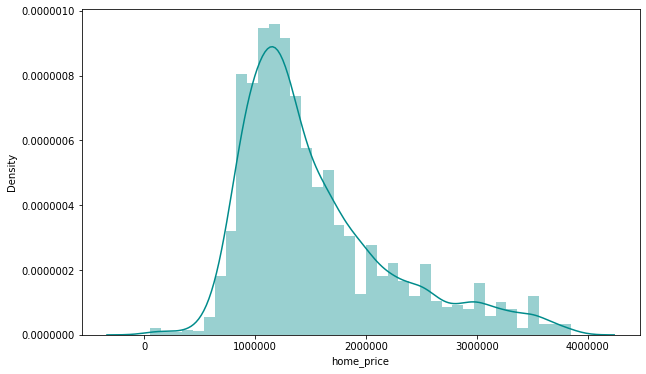

In [58]:

plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain')

sns.distplot(df_cleaned['home_price'], color='#008B8B')


c:\users\manso\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='home_size', ylabel='Density'>

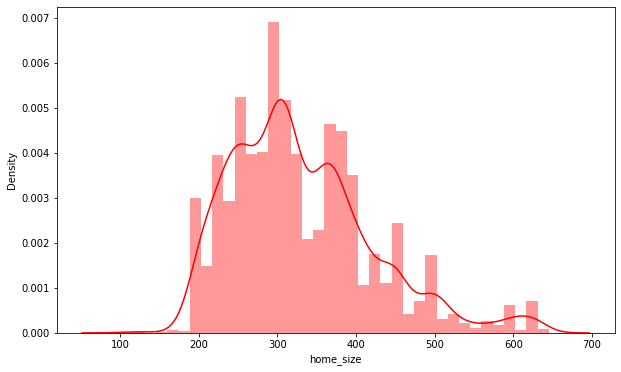

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(df_cleaned['home_size'], color='r')

# Location based on Lat & Long

## we will merge the districts dataframes with Lat & Long dataframe (`riyadh_locations`), for  visualization of average purpose.
* 1- drop unneeded columns from `riyadh_locations`
* 2- change the `District_name_AR` to `district` to be same column name for our dataframe for merge purpose
* 3- make list of each districts based on location on the city (North, West, East, South),
* 4- extract that rows contains the districts, and merge it with `riyadh_locations` in new DF as `mean` values and based on `district` column.
* 5- append all datafames to each other, then download it and visulize the average prices and size on a Map using `Power Bi`


In [60]:
# drop unneeded columns
riyadh_locations = pd.read_excel('riyadh_districts.xlsx')
riyadh_locations.head()

,District_name_EN,District_name_AR,latitude,longitude,Population,Males_(%),Females_(%),Saudis_(%),Non_Saudis_(%),Males,Females,Saudis,Non_Saudis,Average_Income
0,"Ad Dar Al Baida, Riyadh",دار البيضاء,24.566842,46.790295,168900.0,0.56,0.44,0.84,0.16,93908.0,74992.0,142214.0,26686.0,6900.0
1,Ad Dhubbat,الضباط,24.679383,46.721847,20400.0,0.58,0.42,0.15,0.86,11812.0,8588.0,2958.0,17442.0,8200.0
2,Ad Dirah,الديرة,24.573161,46.847922,13100.0,0.81,0.19,0.16,0.84,10637.0,2463.0,2070.0,11030.0,2900.0
3,Ad Diriyah,الدرعية,24.748620,46.535380,11300.0,0.53,0.47,0.82,0.18,5955.0,5345.0,9255.0,2045.0,6900.0
4,Ad Duraihimiyah,الدريهمية,24.590332,46.695121,13700.0,0.56,0.45,0.59,0.41,7604.0,6097.0,8056.0,5644.0,10000.0


In [61]:
# drop unneeded columns
riyadh_locations.drop(['Population','Males_(%)', 'Females_(%)', 'Saudis_(%)','Non_Saudis_(%)','Males', 'Females','Saudis','Non_Saudis','Average_Income'], axis=1, inplace=True)

In [62]:
# change the District_name_AR to district to be same column name for our dataframe for merge purpose
riyadh_locations=riyadh_locations.rename(columns = {'District_name_AR':'district'})

In [63]:
# changed
riyadh_locations.head()

,District_name_EN,district,latitude,longitude
0,"Ad Dar Al Baida, Riyadh",دار البيضاء,24.566842,46.790295
1,Ad Dhubbat,الضباط,24.679383,46.721847
2,Ad Dirah,الديرة,24.573161,46.847922
3,Ad Diriyah,الدرعية,24.748620,46.535380
4,Ad Duraihimiyah,الدريهمية,24.590332,46.695121


### Now, we will dividing the districts to 4 parts by making a lists for districts based on direction:
* North districts
* West districts
* East districts
* South districts


#### extract that rows contains the districts from `df_cleaned` , and merge it with riyadh_locations in new DF as mean values and based on district column.


In [64]:
# here, we made a list for the south district in Riyadh

south_districts = ['الملز','العزيزية','المربع','السلي','الروابي','الربوة','البديعة','طيبة','الاسكان','عليشة','الزهرة','المروة','الحزم','بدر','الشفا','عريض','عكاظ','أحد','شبرا','ديراب']
south = df_cleaned[df_cleaned['district'].str.contains('|'.join(south_districts)) == True]

south_dist_avg = pd.merge(riyadh_locations, south.groupby('district').mean(),on='district', how='inner')
south_dist_avg

,District_name_EN,district,latitude,longitude,home_size,home_price
0,Al Badi'ah,البديعة,24.634622,46.685165,382.526316,1.197237e+06
1,Al Hazm,الحزم,24.539610,46.645542,295.104839,1.153911e+06
2,Al Malaz,الملز,24.666453,46.733141,490.666667,1.527778e+06
3,Al Zahra,الزهرة,24.579737,46.645615,384.100000,1.238000e+06
4,Ar Rabwah,الربوة,24.700069,46.753763,489.555556,1.988889e+06
5,As Sulimaniyah,السليمانية,24.697490,46.708080,403.333333,2.064444e+06
6,Badr,بدر,24.526170,46.724581,311.303887,9.952797e+05
7,Dirab,ديراب,24.512786,46.617887,325.764706,1.068059e+06
8,Okaz,عكاظ,24.515849,46.664346,315.889764,1.094666e+06
9,Rawabi,الروابي,24.696845,46.789128,389.000000,1.752875e+06


In [65]:
# here, we made a list for the east district in Riyadh

east_districts = ['اليرموك','الرمال', 'القادسية', 'اشبيلية', 'النظيم','الندوة','الجنادرية', 'النهضة','الحمراء','الروضة','الخليج','فيصل','المعيزيلة','الجزيرة','المونسية']
east = df_cleaned[df_cleaned['district'].str.contains('|'.join(east_districts)) == True]
east.groupby('district').mean()

east_dist_avg = pd.merge(riyadh_locations, east.groupby('district').mean(),on='district', how='inner')
east_dist_avg

,District_name_EN,district,latitude,longitude,home_size,home_price
0,Al Hamra,الحمراء,24.776654,46.751945,503.142857,3.035714e+06
1,Al Khaleej,الخليج,24.778177,46.802836,427.230769,1.863846e+06
2,Al Munsiyah,المونسية,24.832128,46.767119,336.443182,2.039094e+06
3,Al Yarmuk,اليرموك,24.809435,46.781743,356.311475,2.043607e+06
4,An Nahdah,النهضة,24.765098,46.815010,405.166667,1.814167e+06
5,Ar Rawdah,الروضة,24.735057,46.765943,416.600000,1.610000e+06
6,Ar Rimal,الرمال,24.869555,46.818360,320.620619,1.515753e+06
7,Janadriah,الجنادرية,24.820690,46.864522,311.957447,1.350213e+06
8,Nadheem,النظيم,24.805005,46.894393,325.363636,1.102727e+06
9,Qadisiyah,القادسية,24.820767,46.823207,351.294872,1.784090e+06


In [66]:
# here, we made a list for the west district in Riyadh

west_districts = ['عرقة','المحمدية', 'النخيل','الخالدية','حطين','العريجاء','المهدية','لبن','طويق']
west = df_cleaned[df_cleaned['district'].str.contains('|'.join(west_districts)) == True]
west.groupby('district').mean()

west_dist_avg = pd.merge(riyadh_locations, west.groupby('district').mean(),on='district', how='inner')
west_dist_avg

,District_name_EN,district,latitude,longitude,home_size,home_price
0,Al Khalidiyyah,الخالدية,24.624695,46.753851,520.000000,1.166667e+06
1,Al Mahdiyah,المهدية,24.650661,46.502247,317.513158,1.768422e+06
2,Al Mohammadiyyah,المحمدية,24.732801,46.649029,325.000000,3.500000e+06
3,Al Uraija,العريجاء,24.629573,46.655988,321.500000,1.215000e+06
4,An Nakheel,النخيل,24.746455,46.637230,325.400000,3.100000e+06
5,Hittin,حطين,24.762741,46.600873,302.666667,3.350000e+06
6,Irqah,عرقة,24.691151,46.586998,346.666667,3.300000e+06
7,Laban,لبن,24.613216,46.577784,330.870588,1.550353e+06


In [67]:
# here, we made a list for the north district in Riyadh
north_districts = ['قرطبة','الياسمين', 'النرجس','القيروان','الوادي','العارض','الفلاح','الندى','النفل','الصحافة','الغدير','الملقا','النرجس','المروج','المصيف','الربيع']
north = df_cleaned[df_cleaned['district'].str.contains('|'.join(north_districts)) == True]
north.groupby('district').mean()


north_dist_avg = pd.merge(riyadh_locations, north.groupby('district').mean(), on='district', how='inner')
north_dist_avg

,District_name_EN,district,latitude,longitude,home_size,home_price
0,Al Aarid,العارض,24.898154,46.600623,320.962500,2.505779e+06
1,Al Falah,الفلاح,24.798050,46.708355,365.000000,2.500000e+06
2,Al Ghadir,الغدير,24.772627,46.652865,600.000000,3.550000e+06
3,Al Malqa,الملقا,24.799829,46.597227,321.593750,3.132812e+06
4,Al Maseef,المصيف,24.767072,46.680414,265.500000,1.500000e+06
5,Al Muruj,المروج,24.757634,46.661267,466.666667,2.433333e+06
6,Al Wadi,الوادي,24.789772,46.690454,428.166667,2.466667e+06
7,Al Yasmin,الياسمين,24.829554,46.641144,354.638298,3.022872e+06
8,An Nada,الندى,24.806224,46.681900,319.000000,2.625000e+06
9,An Nafal,النفل,24.782669,46.673148,398.312500,2.546875e+06


In [68]:
# Now, we append all dataframes in one DF, contains district name, Lat&Long, avarege price, avarege size,to visualize it on a Map

df_all= pd.concat([south_dist_avg, east_dist_avg, west_dist_avg, north_dist_avg])

In [69]:
df_all

,District_name_EN,district,latitude,longitude,home_size,home_price
0,Al Badi'ah,البديعة,24.634622,46.685165,382.526316,1.197237e+06
1,Al Hazm,الحزم,24.539610,46.645542,295.104839,1.153911e+06
2,Al Malaz,الملز,24.666453,46.733141,490.666667,1.527778e+06
3,Al Zahra,الزهرة,24.579737,46.645615,384.100000,1.238000e+06
4,Ar Rabwah,الربوة,24.700069,46.753763,489.555556,1.988889e+06
5,As Sulimaniyah,السليمانية,24.697490,46.708080,403.333333,2.064444e+06
6,Badr,بدر,24.526170,46.724581,311.303887,9.952797e+05
7,Dirab,ديراب,24.512786,46.617887,325.764706,1.068059e+06
8,Okaz,عكاظ,24.515849,46.664346,315.889764,1.094666e+06
9,Rawabi,الروابي,24.696845,46.789128,389.000000,1.752875e+06


In [70]:
df_all.shape

(49, 6)

In [71]:
df_all['district'].unique()

array(['البديعة', 'الحزم', 'الملز', 'الزهرة', 'الربوة', 'السليمانية',
       'بدر', 'ديراب', 'عكاظ', 'الروابي', 'شبرا', 'المربع', 'طيبة', 'أحد',
       'عليشة', 'عريض', 'الحمراء', 'الخليج', 'المونسية', 'اليرموك',
       'النهضة', 'الروضة', 'الرمال', 'الجنادرية', 'النظيم', 'القادسية',
       'الخالدية', 'المهدية', 'المحمدية', 'العريجاء', 'النخيل', 'حطين',
       'عرقة', 'لبن', 'العارض', 'الفلاح', 'الغدير', 'الملقا', 'المصيف',
       'المروج', 'الوادي', 'الياسمين', 'الندى', 'النفل', 'النرجس',
       'الربيع', 'الصحافة', 'القيروان', 'قرطبة'], dtype=object)

In [72]:
df_all.to_csv('avg_riyadh_districts.csv')

In [73]:
df_all.to_excel('avg_riyadh_districts.xlsx')